## Dataset - Mall Customers

The objective is to know better the clients, in this dataset we have a spending score, ranging from 1 to 100, which means the expected amount that that client will spend on the mall.

## Hierarchical Clustering

### Importing libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
dataset = pd.read_csv("../../../../datasets/ml_az_course/008_mall_customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = dataset.iloc[:, [3, 4]].values # select values of the last two columns

### Using the dendrogram to find the optimal number of clusters

In [4]:
from scipy.cluster import hierarchy as hc

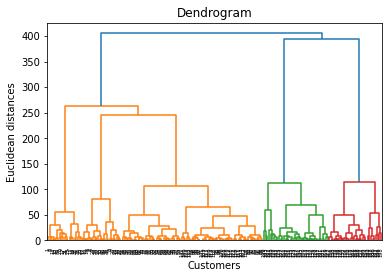

In [5]:
dendrogram = hc.dendrogram(Z=hc.linkage(y=x, method="ward")) # ward method is for minimizing the variance inside the clusters

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

As we can see at the plot, the largest vertical lines are when the threshold cross 3 or 5 vertical lines (1 and 2), so we can choose any. The sum of the green vertical lines indicates the height (expanding freedom degrees given the threshold).


![](./assets/dendrogram_problem.png)

### Training the Hierarchical Clustering model on the dataset

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
agg_hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

y_agg_hc = agg_hc.fit_predict(X=x) 
y_agg_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

### Visualising the clusters

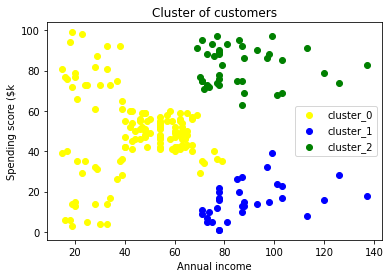

In [9]:
cluster_labels = range(0, 3) # [0-2]
colors = ("yellow", "blue", "green")

for label, color in zip(cluster_labels, colors):
    plt.scatter(x=x[y_agg_hc == label, 0], y=x[y_agg_hc == label, 1], c=color, label=f"cluster_{label}")

plt.title("Cluster of customers")
plt.xlabel("Annual income")
plt.ylabel("Spending score ($k")
plt.legend()
plt.show()